In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df.columns=df.columns.str.strip()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# View the number of rows and columns
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 768 rows and 7 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


**Descriptive Statistics**¶

Employing descriptive statistics to succinctly summarize and comprehend the fundamental features of the dataset.

In [8]:
# Descriptive statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


**Descriptive Statistics Observations**¶

The dataset spans from May 2019 to June 2020, with an average unemployment rate of approximately 11.79% and an average labor participation rate of around 42.63%.
Unemployment rates vary widely, ranging from 0% to 76.74%, with significant fluctuations over time, while employed individuals range from approximately 49,420 to 45,777,510


# Handling Missing Values

In [9]:
# Check for missing values  
print(df.isnull().sum())

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [10]:
# Drop Missing Values
# Drop rows with missing values
df = df.dropna()

In [11]:
# check missing values again
print(df.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


Hence no Missing values found 



**Check Duplicates**

In [12]:
# Check for duplicates
print(df.duplicated().sum())

0


Hence no duplicates found 


# Comprehensive Exploratory Analysis and Visual Insights

Adding Extra Columns To The Dataframe

In [13]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Importing Warnings library
import warnings

# Ignoring unwanted warnings
warnings.filterwarnings("ignore")

df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,May,2020


In [15]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Day', 'Month', 'Year'],
      dtype='object')

# Summay Statistics

In [16]:
# Summary statistics
print(df.describe())

# Mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06                                38.06

# Unemployment rate over time

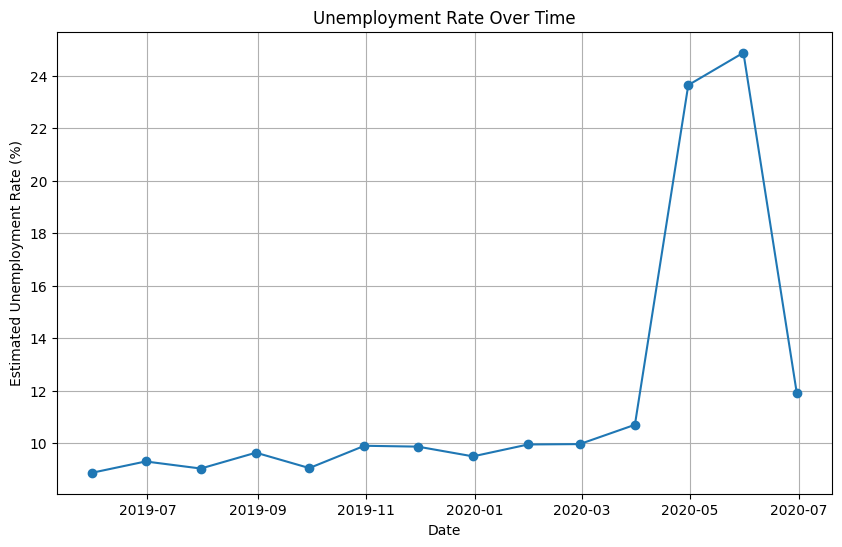

In [17]:
import matplotlib.pyplot as plt

# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

# Bar Plot of Average Estimated Unployment Rate

In [18]:
# Bar Plot of Average Estimated Unployment Rate
fig = px.bar(df, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

# Bar Plot of Estimated Employed people in every month

In [19]:
# Bar Plot of Estimated Employed people in every month
fig = px.bar(df, x = 'Month', y = 'Estimated Employed', color = 'Month', title = 'Estimated Employed People')
fig.show()

#  Sunburst plot

In [20]:
# Create the Sunburst plot
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()

# Box plot

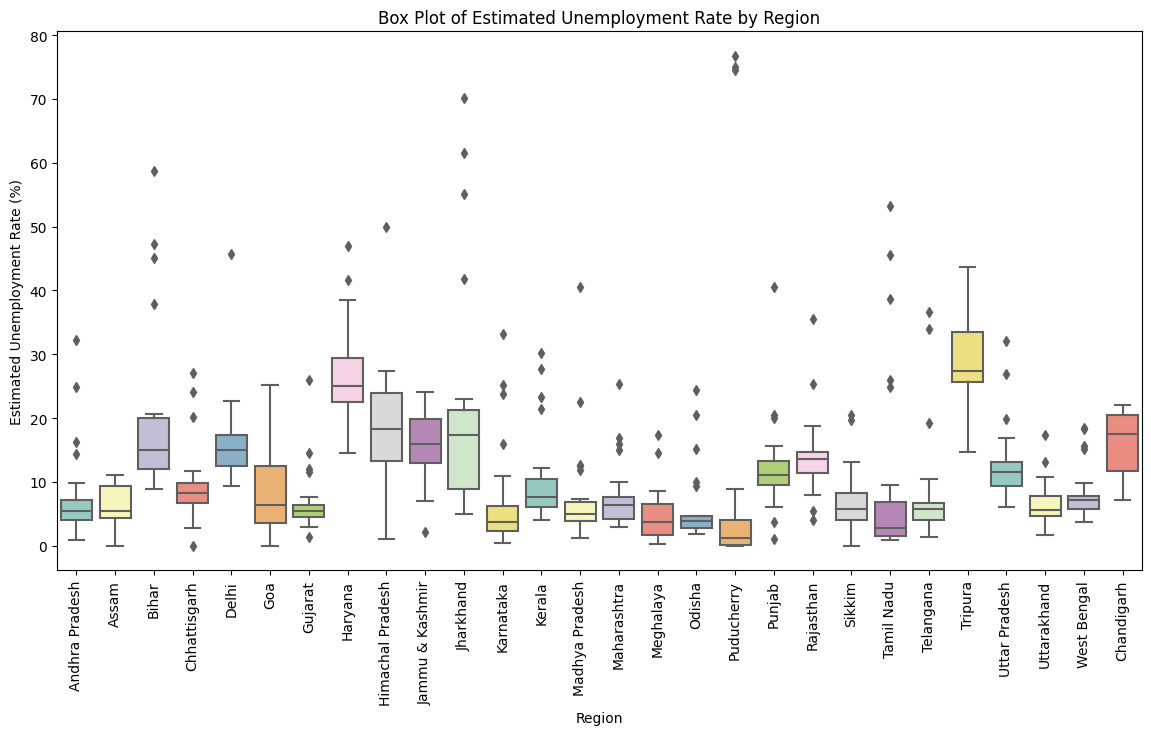

In [21]:
plt.figure(figsize=(14, 7))
# Create the box plot with separate colors for each region
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette='Set3')
# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
# Add title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show the plot
plt.show()

**Credit**:

https://www.kaggle.com/code/noormuhammad106/covid-19-unemployment-analysis